# Dijkstra 

### Librerias Necesarias

In [ ]:
pip install heapq

In [ ]:
pip install networkx

In [4]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

Distancia más corta desde el nodo 0:
Nodo: 0, distancia: 0
Nodo: 1, distancia: 2
Nodo: 2, distancia: 6
Nodo: 3, distancia: 7
Nodo: 4, distancia: 17
Nodo: 5, distancia: 22
Nodo: 6, distancia: 19

Tiempo de ejecución de Dijkstra (promedio de 1000 ejecuciones): 0.000006 segundos


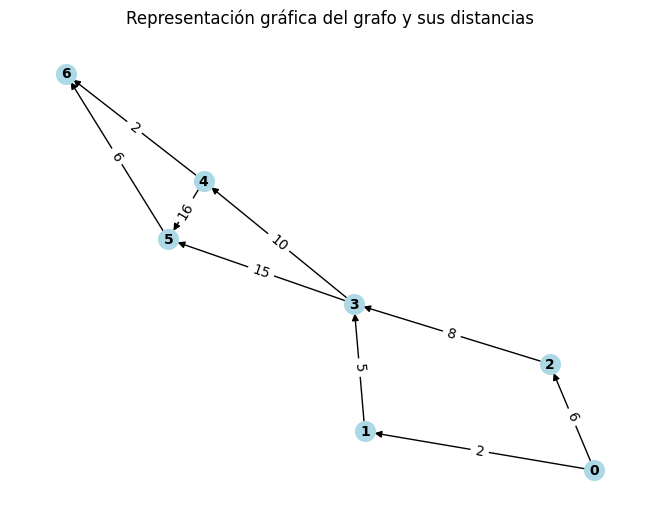

In [89]:
def dijkstra(grafo, nodo_origen):
    # Inicializar las distancias más cortas a infinito
    distancias = {nodo: float('inf') for nodo in grafo}
    distancias[nodo_origen] = 0  # Se le indica que la distancia al nodo origen es 0

    # Cola para determinar la exploración de nodos
    cola_prioridad = [(0, nodo_origen)]

    # Mientras haya nodos, va a explorar
    while cola_prioridad:
        # Obtención del nodo con menor distancia, como primera vez sabemos que es 0
        distancias_actual, nodo_actual = heapq.heappop(cola_prioridad)
        
        # Si la distancia actual es mayor a la registrada, continuar
        if distancias_actual > distancias[nodo_actual]:
            continue

        # Explorar los vecinos del nodo actual (cercanos)
        for vecino, peso in grafo[nodo_actual].items():
            # Calcular la distancia al vecino a través del nodo actual
            nueva_distancia = distancias_actual + peso

            # Si la nueva distancia es menor que la registrada, actualizar
            if nueva_distancia < distancias[vecino]:
                distancias[vecino] = nueva_distancia
                # Agregar al vecino a la cola de prioridad 
                heapq.heappush(cola_prioridad, (nueva_distancia, vecino))

    return distancias

def graficar_grafo(grafo): 
    # Instancia de la clase para graficar nodos
    Grafox = nx.DiGraph()

    # Añadir los nodos y las aristas con pesos
    for nodo, vecinos in grafo.items():
        for vecino, pesos in vecinos.items():
            Grafox.add_edge(nodo, vecino, weight=pesos)

    # Obtener las posiciones para la gráfica
    pos = nx.spring_layout(Grafox)

    # Dibujar los nodos y las etiquetas
    nx.draw(Grafox, pos, with_labels=True, node_color='lightblue', node_size=200,
            font_size=10, font_weight='bold')
    
    # Dibujar las etiquetas de las aristas (pesos)
    labels = nx.get_edge_attributes(Grafox, 'weight')
    nx.draw_networkx_edge_labels(Grafox, pos, edge_labels=labels, font_size=10)
    
    # Mostrar la gráfica
    plt.title("Representación gráfica del grafo y sus distancias")
    plt.show()

# Definir el grafo
grafo = {
    '0': {'1': 2, '2': 6},
    '1': {'3': 5},
    '2': {'3': 8},
    '3': {'5': 15, '4': 10},
    '4': {'5': 16, '6': 2},
    '5': {'6': 6},
    '6': {},
}

# Medir tiempo de ejecución de Dijkstra con timeit
tiempo_ejecucion = timeit.timeit(
    lambda: dijkstra(grafo, '0'),  # Función a medir
    number=1000  # Número de repeticiones para mayor precisión
)

# Ejecución del algoritmo Dijkstra
resultado = dijkstra(grafo, '0')

# Recorrido de la lista de resultados
print("Distancia más corta desde el nodo 0:")
for nodo, distancia in resultado.items():
    print(f"Nodo: {nodo}, distancia: {distancia}")

# Mostrar el tiempo de ejecución promedio
print(f"\nTiempo de ejecución de Dijkstra (promedio de 1000 ejecuciones): {tiempo_ejecucion / 1000:.6f} segundos")

# Gráfica
graficar_grafo(grafo)
